In [2]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
from datetime import datetime
%matplotlib inline

In [3]:

start = datetime(2006,1,1)
end=datetime(2016,1,1)
BAC = data.DataReader("BAC", 'yahoo', start, end)
C=data.DataReader("C", 'yahoo', start, end)
GS=data.DataReader("GS", 'yahoo', start, end)
JPM=data.DataReader("JPM", 'yahoo', start, end)
MS=data.DataReader("MS", 'yahoo', start, end)
WFC=data.DataReader("WFC", 'yahoo', start, end)

allbanks=pd.read_pickle('all_banks')


In [4]:
BAC.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,47.180000,46.150002,46.919998,47.080002,16296700.0,33.584072
2006-01-04,47.240002,46.450001,47.000000,46.580002,17757900.0,33.227394
2006-01-05,46.830002,46.320000,46.580002,46.639999,14970700.0,33.270210
2006-01-06,46.910000,46.349998,46.799999,46.570000,12599800.0,33.220257
2006-01-09,46.970001,46.360001,46.720001,46.599998,15619400.0,33.241665


In [5]:
tickers=['BAC','C','GS','JPM','MS','WFC']


In [6]:
bank_stocks=pd.concat([BAC,C,GS,JPM,MS,WFC],keys=tickers,axis=1)
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [7]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   33.584072  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   33.227394  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   33.270210  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   33.220257  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   33.241665  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  35.224964  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  35.249134  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  35.345787  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  35.382019  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  35.756561  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.104454  
2006-01-04   31.799999  31.530001  10870000.0  19.871267  
2006-01-05   31.500000  31.495001  10158000.0  19.849209  
2006-01-06   31.580000  31.680000   8403800.0  19.965803  
2006-01-09   31.674999  31.674999   5619600.0  19.962654  

[5 rows x 36 columns]

In [8]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

In [9]:
returns=pd.DataFrame()

In [10]:
returns

""


In [11]:
for tick in tickers:
    returns[tick+' return']=bank_stocks[tick]['Close'].pct_change()

In [13]:
returns

,BAC return,C return,GS return,JPM return,MS return,WFC return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158
...,...,...,...,...,...,...
2015-12-24,-0.004037,0.001520,-0.002624,-0.001948,-0.003681,-0.003997
2015-12-28,-0.008107,-0.006261,-0.004658,-0.003303,-0.009544,-0.002554
2015-12-29,0.008757,0.011455,0.010516,0.010395,0.011812,0.011156


In [14]:
import seaborn as sns

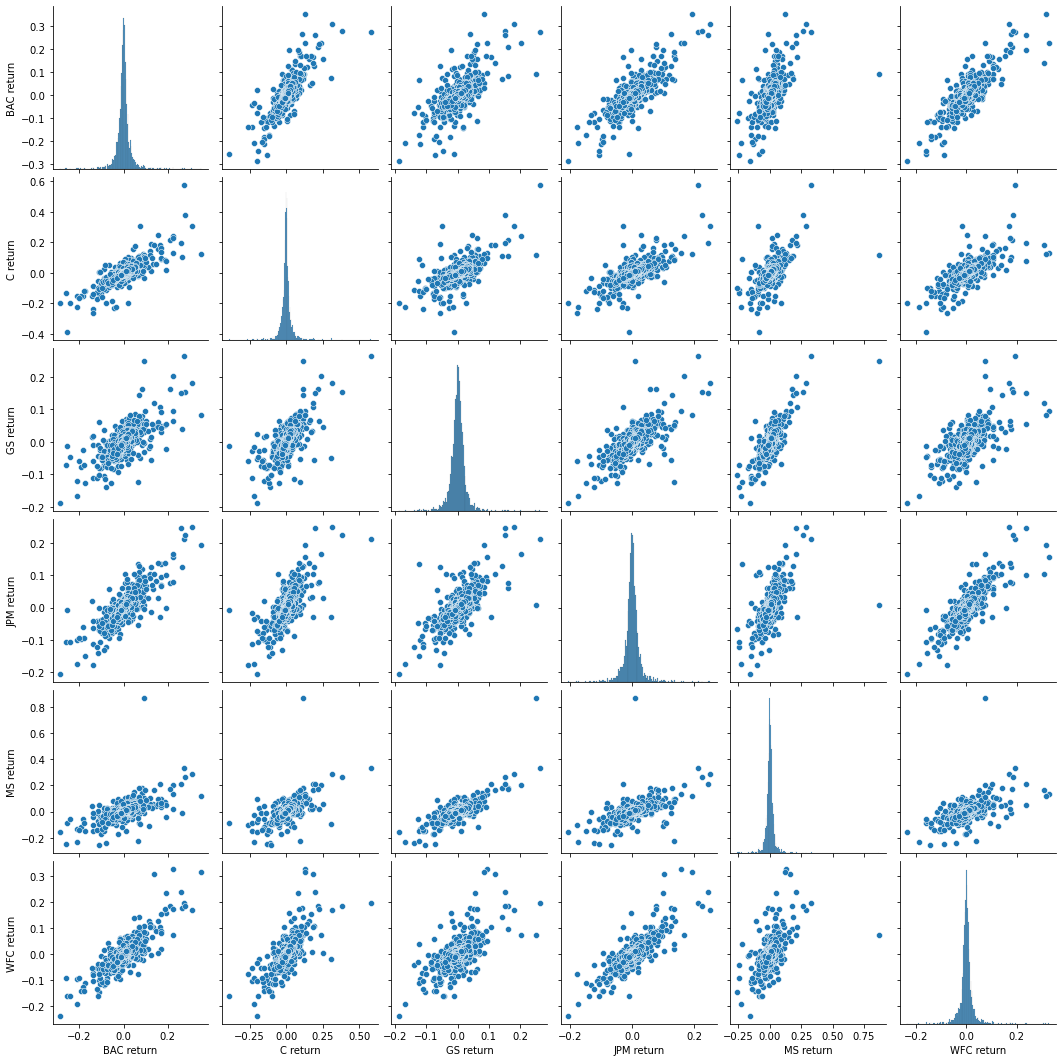

In [15]:
sns.pairplot(returns[1:])


In [16]:
returns.head()

,BAC return,C return,GS return,JPM return,MS return,WFC return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


In [17]:
returns


,BAC return,C return,GS return,JPM return,MS return,WFC return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158
...,...,...,...,...,...,...
2015-12-24,-0.004037,0.001520,-0.002624,-0.001948,-0.003681,-0.003997
2015-12-28,-0.008107,-0.006261,-0.004658,-0.003303,-0.009544,-0.002554
2015-12-29,0.008757,0.011455,0.010516,0.010395,0.011812,0.011156


In [27]:
for tick in tickers:
    print(returns[tick+' return'].min())

-0.2896935896149381
-0.39024391189445073
-0.1895961904204888
-0.20727430348341036
-0.25892854912751284
-0.23822273502353553


In [35]:
returns.idxmin()

BAC return   2009-01-20
C return     2009-02-27
GS return    2009-01-20
JPM return   2009-01-20
MS return    2008-10-09
WFC return   2009-01-20
dtype: datetime64[ns]

In [36]:
returns.idxmax()

BAC return   2009-04-09
C return     2008-11-24
GS return    2008-11-24
JPM return   2009-01-21
MS return    2008-10-13
WFC return   2008-07-16
dtype: datetime64[ns]

In [37]:
returns.std()

BAC return    0.036647
C return      0.038672
GS return     0.025390
JPM return    0.027667
MS return     0.037819
WFC return    0.030238
dtype: float64

In [42]:
returns.loc['2015-01-01':'2015-12-31'].std()

BAC return    0.016163
C return      0.015289
GS return     0.014046
JPM return    0.014017
MS return     0.016249
WFC return    0.012591
dtype: float64

In [43]:
returns.head()

,BAC return,C return,GS return,JPM return,MS return,WFC return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


In [68]:
x=returns['MS return'].loc['2015-01-01':'2015-12-31']

<AxesSubplot:xlabel='MS return', ylabel='Density'>

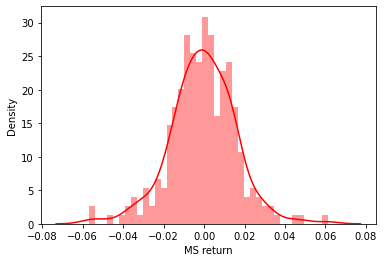

In [69]:
sns.distplot(x,bins=40,color='red')

In [50]:
y=returns['C return'].loc['2008-01-01':'2008-12-31']

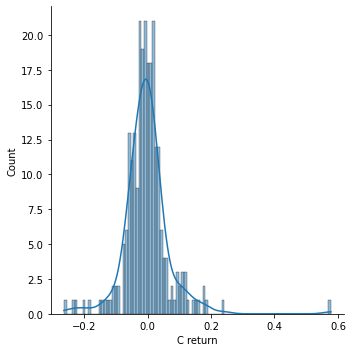

In [55]:
sns.displot(y,bins=100,kde=True)

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly
import cufflinks as cf

In [57]:
cf.go_offline()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


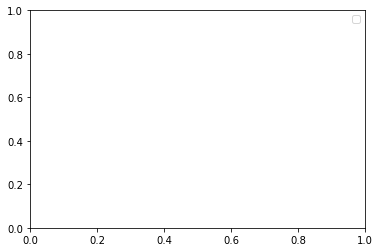

In [139]:
for tick in tickers:
    bank_stocks[tick]['Close'].iplot()
plt.legend()

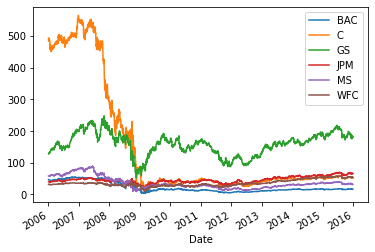

In [82]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(label=tick)
plt.legend()

In [87]:
f=bank_stocks.xs(key='Close',axis=1,level='Stock Info')

In [89]:
p=f.corr()

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

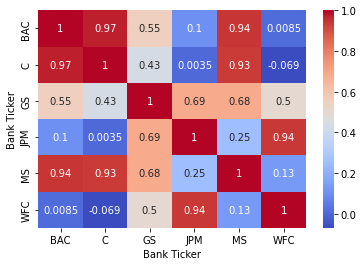

In [107]:
sns.heatmap(p,cmap='coolwarm',annot=True)

In [92]:
#Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008*

<AxesSubplot:xlabel='Date'>

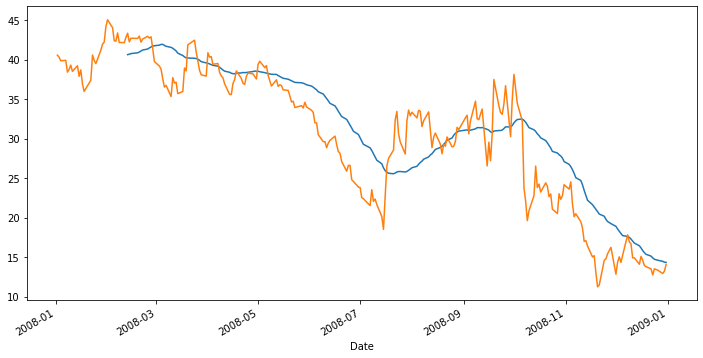

In [120]:
plt.figure(figsize=(12,6))
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30dayavg')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')

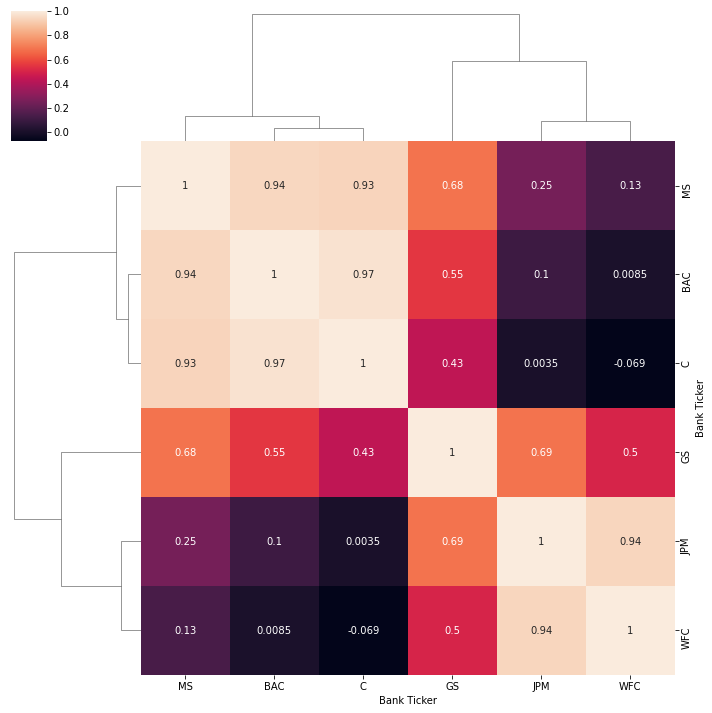

In [123]:
sns.clustermap(p,annot=True)

In [126]:
bank_stocks['BAC'].loc['01-01-2015':'01-01-2016'].iplot(kind='candle')

In [129]:
BAC[['Open', 'High', 'Low', 'Close']].loc['2015-01-01':'2016-01-01'].iplot(kind='candle')


In [135]:
bank_stocks['MS']['Close'].loc['01-01-2015':'31-12-2015'].ta_plot(study='sma')

C:\Users\ARCY\anaconda3\lib\site-packages\pandas\core\indexing.py:1214: UserWarning:

Parsing '31-12-2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\ARCY\anaconda3\lib\site-packages\pandas\core\indexes\base.py:6393: UserWarning:

Parsing '31-12-2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.



In [136]:
bank_stocks['BAC']['Close'].loc['2015-01-01':'2015-12-31'].ta_plot(study='boll')

In [134]:
BAC['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')